In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

### 채널정보

In [2]:
df1 = pd.read_csv('open/train/2018_train_채널정보.csv')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문횟수_R6M,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,0,22,221,6,Android,0,0,0,0
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,0,Android,11,6,5,5
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,0,23,219,6,Android,0,0,0,0
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,0,Android,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,1,NaN,0,0,0,0
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0


In [3]:
# 데이터 프레임 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 105 entries, 기준년월 to 홈페이지_선결제건수_R3M
dtypes: int64(98), object(7)
memory usage: 1.9+ GB


In [4]:
# 결측치 확인
df1.isna().sum()

기준년월                    0
ID                      0
인입횟수_ARS_R6M            0
이용메뉴건수_ARS_R6M          0
인입일수_ARS_R6M            0
                   ...   
OS구분코드            1633566
홈페이지_금융건수_R6M           0
홈페이지_선결제건수_R6M          0
홈페이지_금융건수_R3M           0
홈페이지_선결제건수_R3M          0
Length: 105, dtype: int64

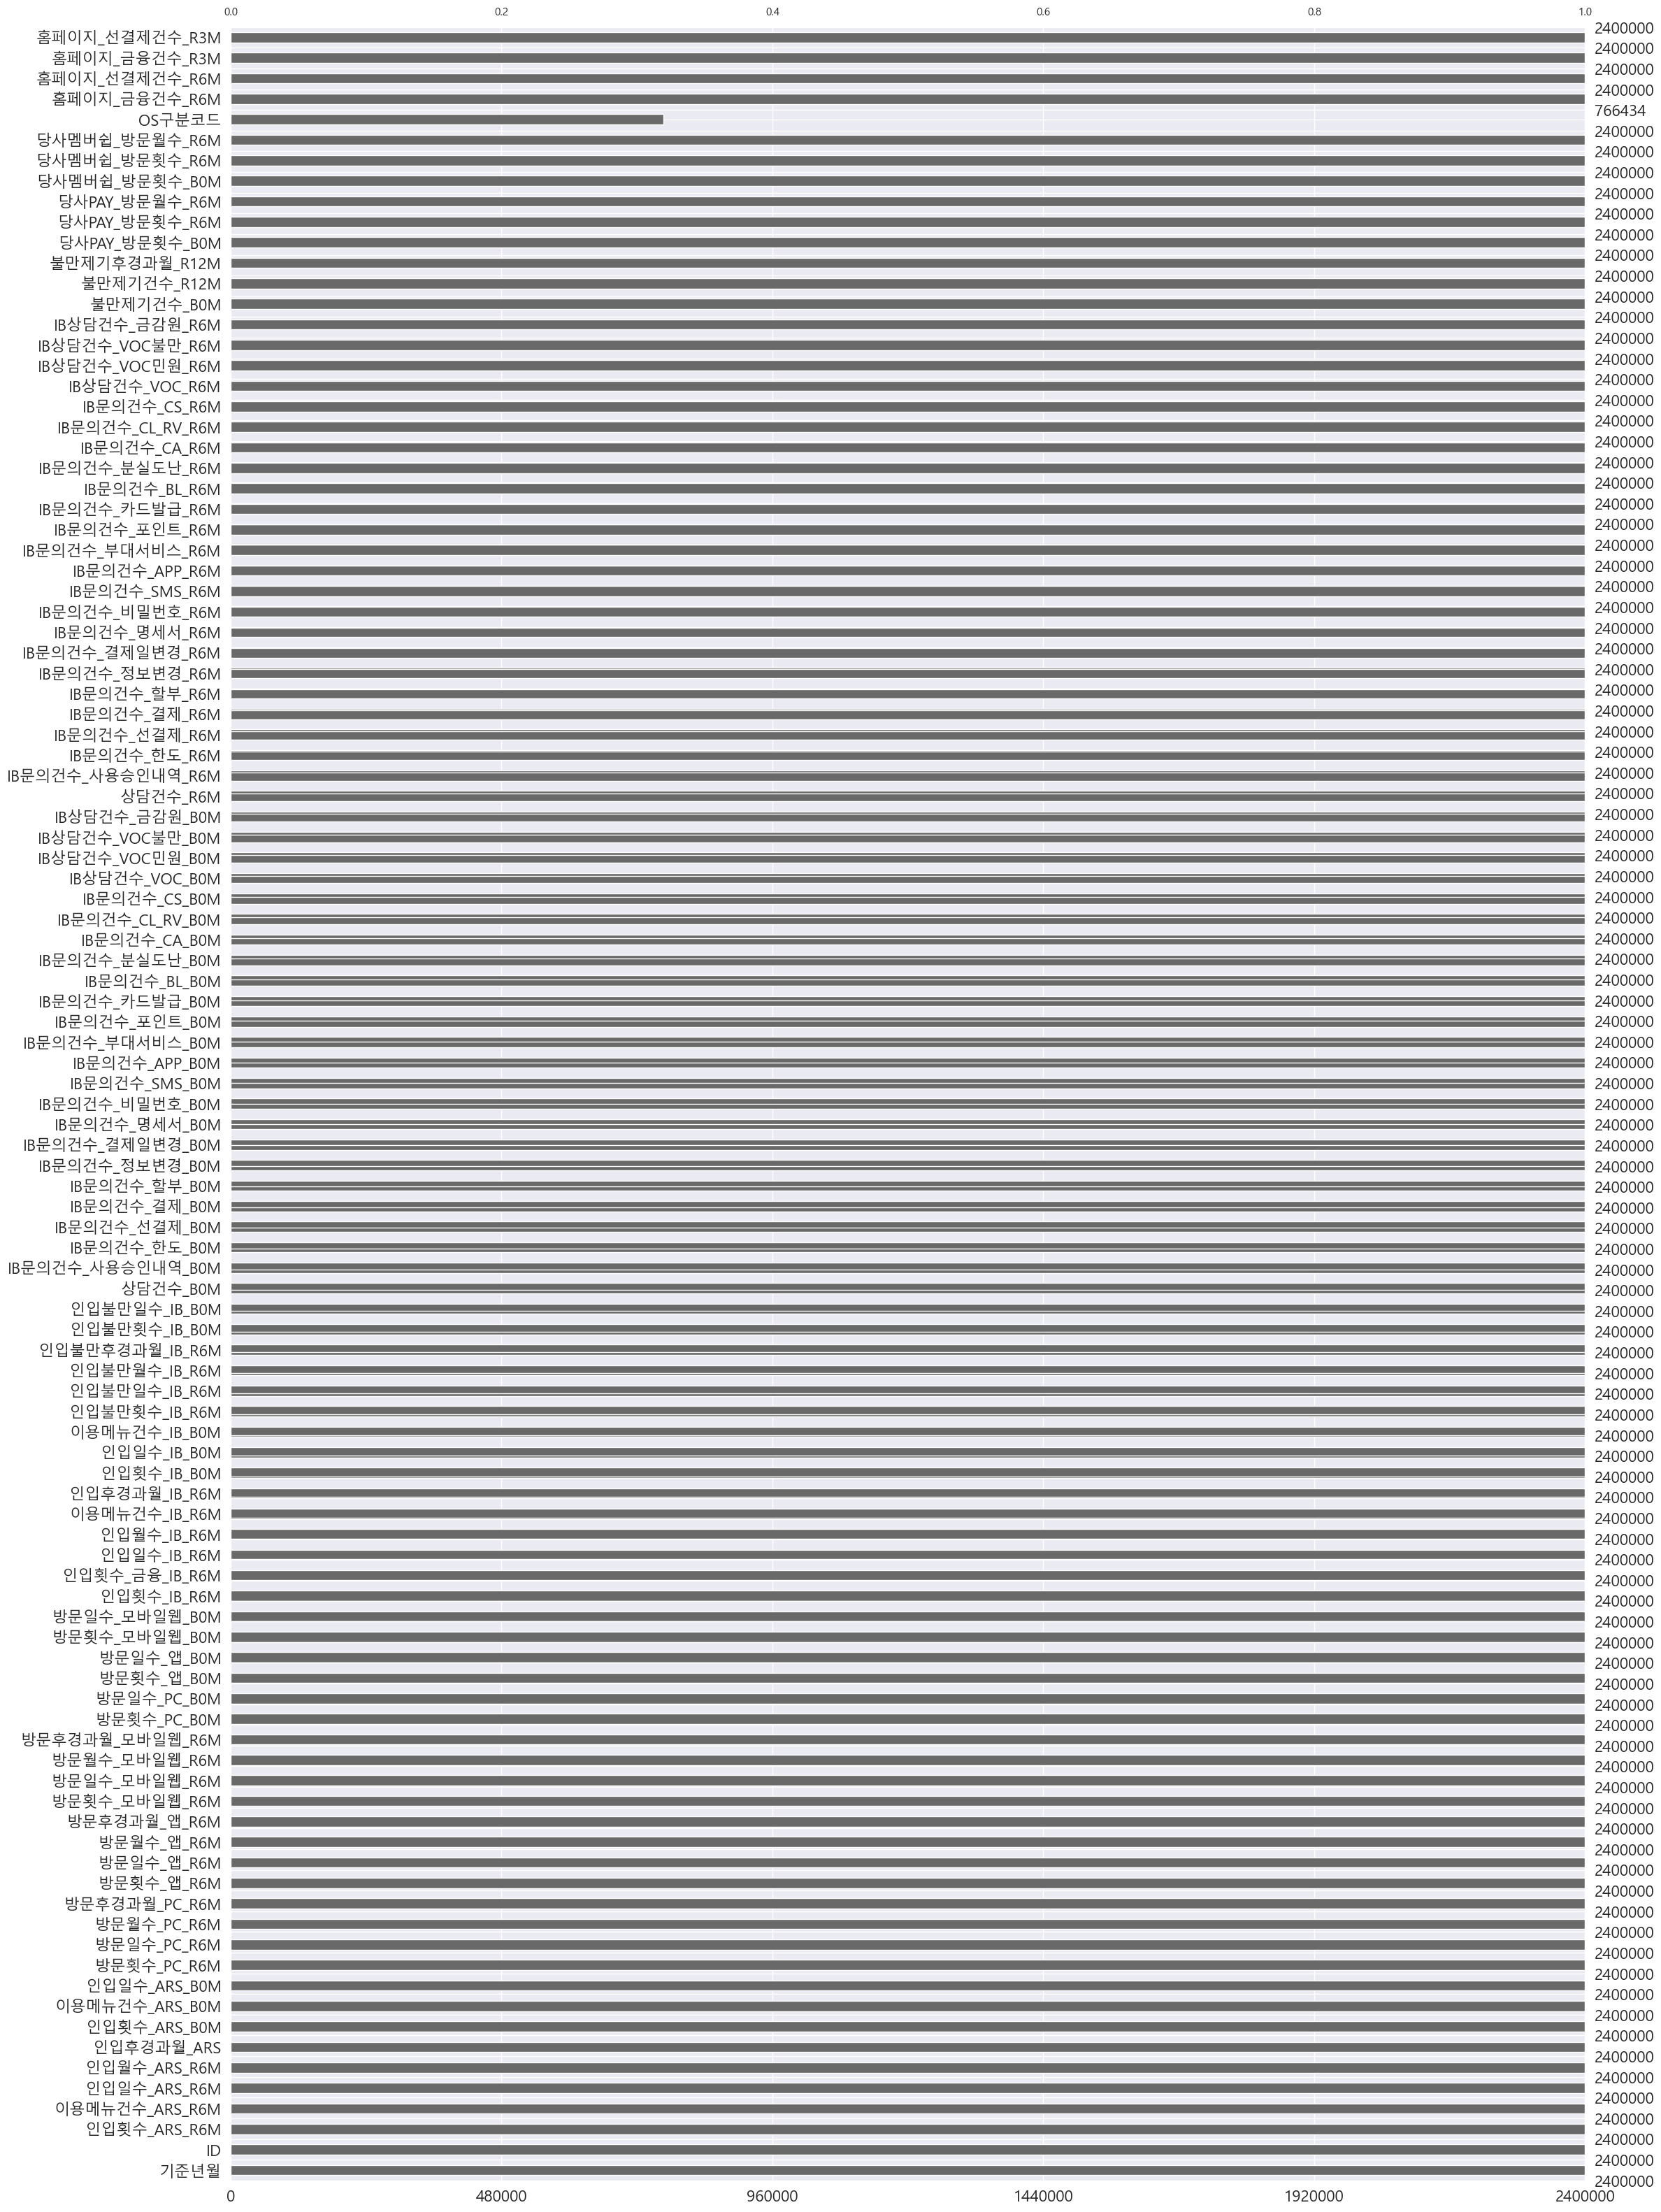

In [6]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
missingno.bar(df1)
plt.show()

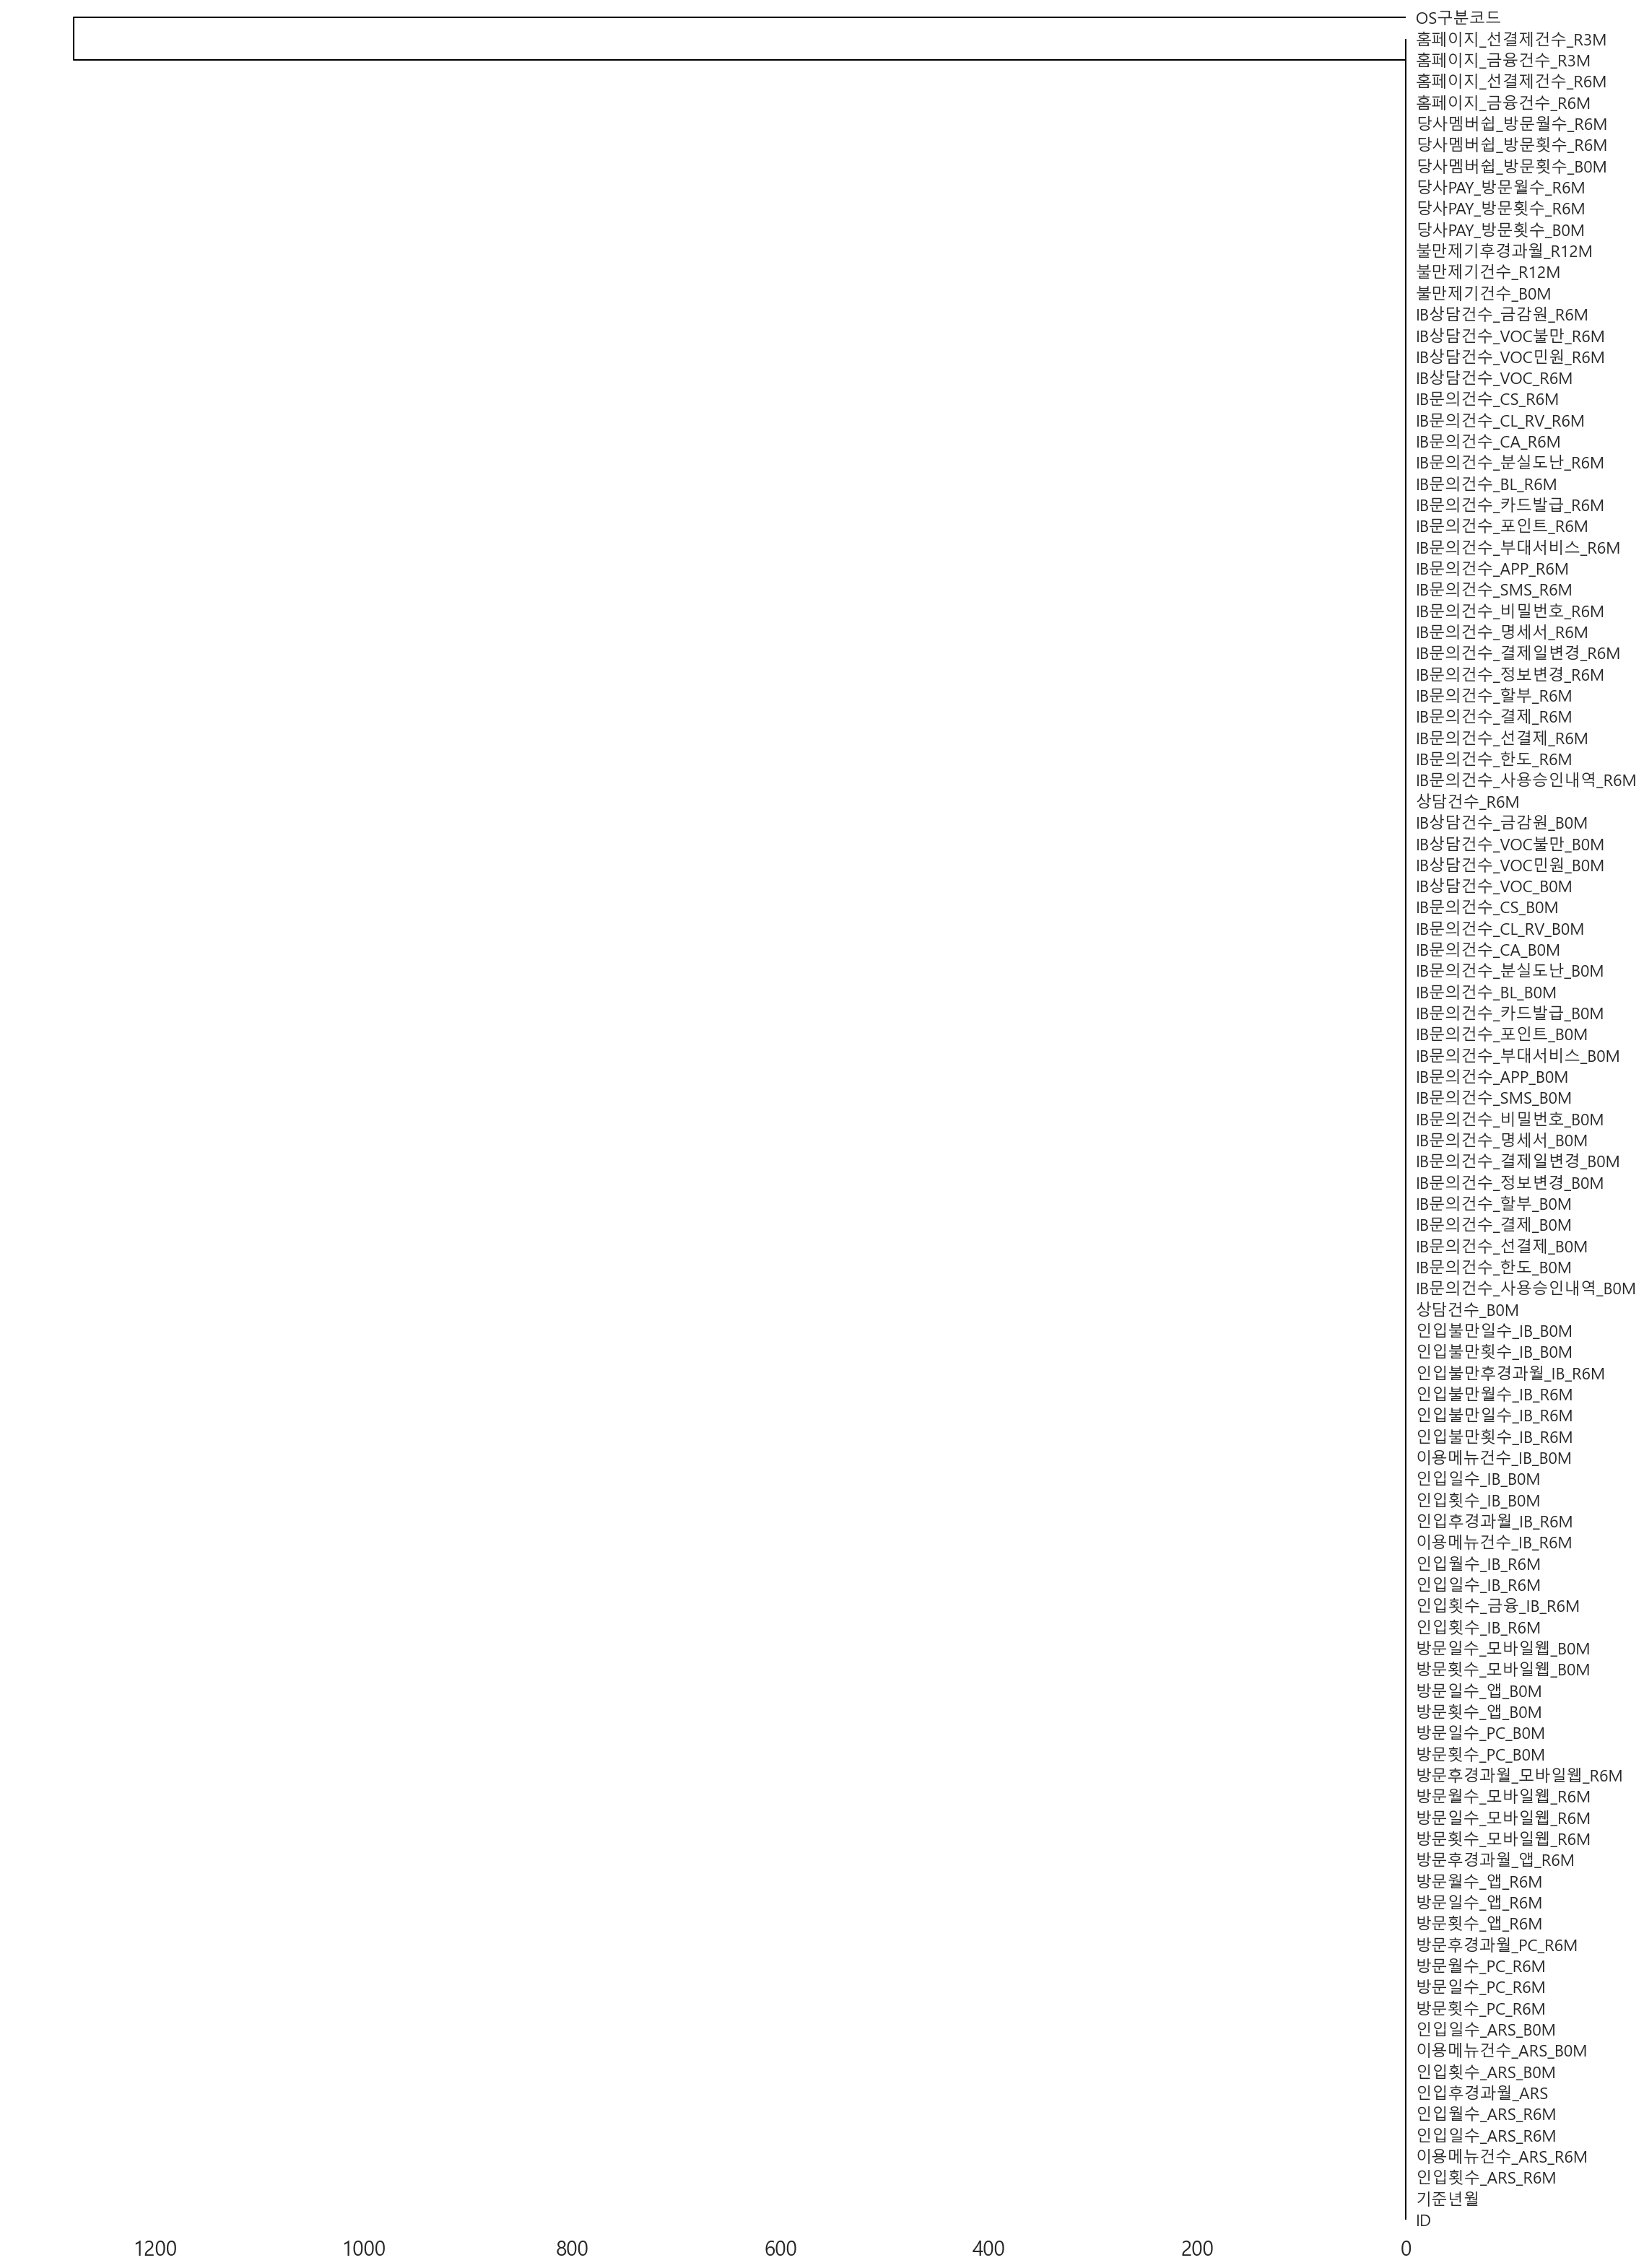

In [7]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
missingno.dendrogram(df1)
plt.show()

### 결측치 리스트
- OS구분코드 -> 제거 -> 나중에 확인해야해서 제거안함

In [9]:
# df2 = df1.drop(columns=['OS구분코드'], inplace=False)

### 채널정보에 Segment가 없어서 회원정보에서 가져와서 붙여준다.

In [11]:
member_df = pd.read_csv('open/train/2018_train_회원정보.csv')
member_df

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,39
2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),24
2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,18
2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),27


In [32]:
# 1. 회원정보에서 Segment 컬럼만 추출 + 중복 제거
segment_df = member_df[['ID', 'Segment']].drop_duplicates()
segment_df

,ID,Segment
0,TRAIN_000000,D
1,TRAIN_000001,E
2,TRAIN_000002,C
3,TRAIN_000003,D
4,TRAIN_000004,E
...,...,...
399995,TRAIN_399995,E
399996,TRAIN_399996,D
399997,TRAIN_399997,C
399998,TRAIN_399998,E


In [34]:
# 2. 채널정보(df1)에 ID 기준으로 병합
df2 = df1.merge(segment_df, on='ID', how='left')
df2

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,22,221,6,Android,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,Android,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,23,219,6,Android,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,Android,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,1,NaN,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E


In [36]:
df2.to_csv('2018_train_채널정보_segment병합.csv', index=False, encoding='utf-8-sig')